# k-means

In this tutorial, we're going to be building our own **k-means** algorithm from scratch. 

Recall the methodology for the k-means algorithm:

    1. Choose value for # of clusters K
    2. Randomly select K to start as your centroids
    3. Calculate distance of all other values to centroids
    4. Classify other values to closest centroid
    5. Take mean of each class (mean of all value by class), making that mean the new centroid
    6. Repeat steps 3-5 until optimized (centroids no longer moving)

To begin, we will start with some random data.

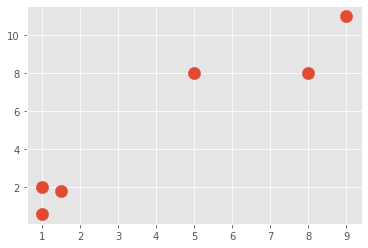

In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np

colors = 10*["g","r","c","b","k"]

X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11]])

plt.scatter(X[:,0], X[:,1], s=150)
plt.show()

It should be obvious where our clusters are.

We're going to be choosing **k=2**. 

# K-Means class.

We just set up some starting values here:

- _k_ # of clusters
- _tol_ is the tolerance, which will allow us to say we're optimized if the centroid is not moving more than the tolerance value
- _max_iter_ value is to limit the number of cycles we're willing to run

    class K_Means:
        def __init__(self, k=2, tol=0.001, max_iter=300):
            self.k = k
            self.tol = tol
            self.max_iter = max_iter
        
To begin, we know we just need to pass whatever data we're fitting to. We then begin an empty dictionary for our centroids.
Next, we begin a for loop which simply assigns our starting centroids as the first two data samples in our data. If you wanted to truly select randomly the starting centroids, you could first shuffle the data, but this should be fine.

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

]
                
We start with empty classifications, and then create two dict keys (by iterating through range of self.k).

Next, we need to iterate through our values, calculate distances of the values to the current centroids, and classify them as such:

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []
                
            for value in data:
                distances = [np.linalg.norm(value-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(value)

Next, we're going to need to create the new centroids, as well as measuring the movement of the centroids. If that movement is less than our tolerance (self.tol), then we're all set. Including that addition, full code up to this point:

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)   
                
Now that we have new centroids, and knowledge of the previous centroids, we're curious if we're optimized yet. Easy enough, we will add the following to the end of the fit method:

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False
                    
We start off assuming we are optimized. We then take all of the centroids, and compare them to the previous centroids. If they are within our required tolerance, then we're happy. If not, then we set optimized to False and we continue in our for for i in range(self.max_iter): loop. If we are optimized?

            if optimized:
                break
                
                
                
**Predict**

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
        
        
The entire k-means class looks like this:

In [2]:

class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def euclidean_distance(self, X,Y):
       d = (np.sum((X-Y)**2))**0.5
       return d

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for value in data:
                # use euclidean_distance or np.linalg.norm
                distances = [self.euclidean_distance(value, self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(value)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification


            

Now we can do something like:

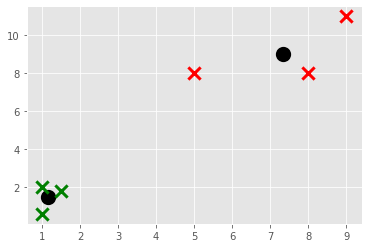

In [3]:

clf = K_Means()
clf.fit(X)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=3)

for classification in clf.classifications:
    color = colors[classification]
    for value in clf.classifications[classification]:
        plt.scatter(value[0], value[1], marker="x", color=color, s=150, linewidths=3)
        
plt.show()

How about we test the predictions next?

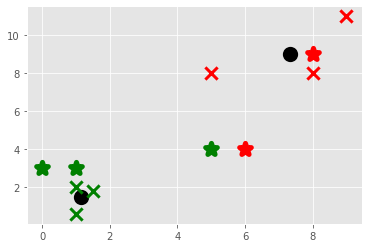

In [4]:
clf = K_Means()
clf.fit(X)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=3)

for classification in clf.classifications:
    color = colors[classification]
    for value in clf.classifications[classification]:
        plt.scatter(value[0], value[1], marker="x", color=color, s=150, linewidths=3)
        


unknowns = np.array([[1,3],
                     [8,9],
                     [0,3],
                     [5,4],
                     [6,4],])

for unknown in unknowns:
    classification = clf.predict(unknown)
    plt.scatter(unknown[0], unknown[1], marker="*", color=colors[classification], s=150, linewidths=5)


plt.show()

What if we took our predictions and added them to the original dataset? That would move the centroids, and would it possibly mean new classifications for any of the data?

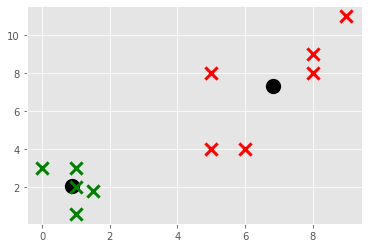

In [5]:

X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11],
              [1,3],
              [8,9],
              [0,3],
              [5,4],
              [6,4],])

clf = K_Means()
clf.fit(X)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=3)

for classification in clf.classifications:
    color = colors[classification]
    for value in clf.classifications[classification]:
        plt.scatter(value[0], value[1], marker="x", color=color, s=150, linewidths=3)

plt.show()

The featureset [5,4] changed groups when it was used for fitment.